# RC Round End Section

                              Section Properties                               
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Symbol    ┃ Value                  ┃ Definition                             ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ A         │ 2.851E+01              │ Cross-sectional area                   │
│ Asy       │ 2.441E+01              │ Shear area y-axis                      │
│ Asz       │ 2.379E+01              │ Shear area z-axis                      │
│ centroid  │ (2.000E+00, 2.000E+00) │ Elastic centroid                       │
│ Iy        │ 3.379E+01              │ Moment of inertia y-axis               │
│ Iz        │ 1.262E+02              │ Moment of inertia z-axis               │
│ Iyz       │ -1.279E-13             │ Product of inertia                     │
│ Wyt       │ 1.689E+01              │ Section moduli of top fibres y-axis    │
│ Wyb       │ 1.689E+01              │ Section moduli of bottom fibres y-axis │
│ Wzt       │ 3.160E+01              │ Section moduli of top fibres z-axis    │
│ Wzb       │ 3.160E+01              │ Section moduli of bottom fibres z-axis │
│ J         │ 1.033E+02              │ Torsion constant                       │
│ phi       │ -9.000E+01             │ Principal axis angle                   │
│ mass      │ 2.851E+01              │ Section mass                           │
│ rho_rebar │ 3.639E-03              │ Ratio of reinforcement                 │
└───────────┴────────────────────────┴────────────────────────────────────────┘

                           Frame Section Properties                            
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Symbol    ┃ Value                  ┃ Definition                             ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ A         │ 2.851E+01              │ Cross-sectional area                   │
│ centroid  │ (2.000E+00, 2.000E+00) │ Elastic centroid                       │
│ Iy        │ 3.379E+01              │ Moment of inertia y-axis               │
│ Iz        │ 1.262E+02              │ Moment of inertia z-axis               │
│ Iyz       │ -1.279E-13             │ Product of inertia                     │
│ Wyt       │ 1.689E+01              │ Section moduli of top fibres y-axis    │
│ Wyb       │ 1.689E+01              │ Section moduli of bottom fibres y-axis │
│ Wzt       │ 3.160E+01              │ Section moduli of top fibres z-axis    │
│ Wzb       │ 3.160E+01              │ Section moduli of bottom fibres z-axis │
│ J         │ 1.033E+02              │ Torsion constant                       │
│ phi       │ -9.000E+01             │ Principal axis angle                   │
│ mass      │ 2.851E+01              │ Section mass                           │
│ rho_rebar │ 3.639E-03              │ Ratio of reinforcement                 │
└───────────┴────────────────────────┴────────────────────────────────────────┘

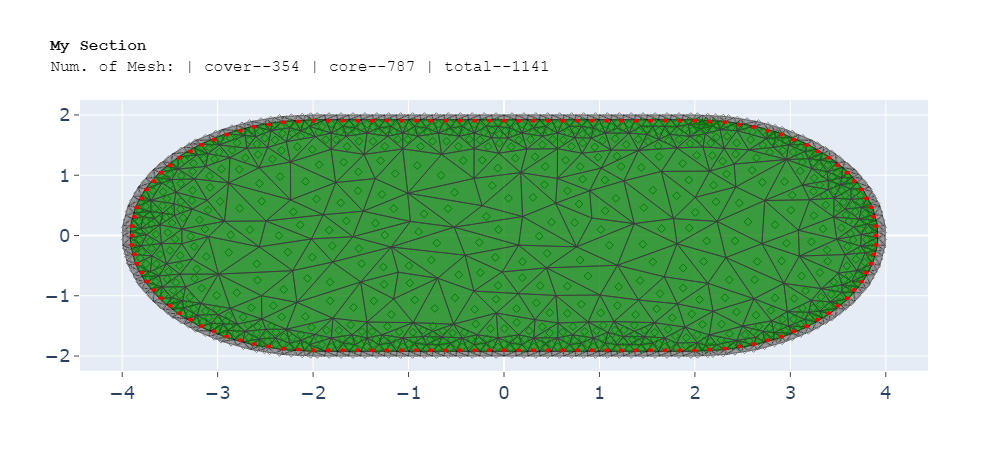

In [1]:
import numpy as np
import opstool as opst

left_circ_angles = np.linspace(90, 270, 20)
right_circ_angles = np.linspace(-90, 90, 20)
left_circ_lines = []
right_circ_lines = []
r = 2
b = 4
for ang in left_circ_angles:
    ang = ang / 180 * np.pi
    left_circ_lines.append([0 + r * np.cos(ang), r + r * np.sin(ang)])
for ang in right_circ_angles:
    ang = ang / 180 * np.pi
    right_circ_lines.append([b + r * np.cos(ang), r + r * np.sin(ang)])
outlines = left_circ_lines + right_circ_lines
cover_d = 0.08
coverlines = opst.offset(outlines, d=cover_d)
cover = opst.add_polygon(outlines, holes=[coverlines])
core = opst.add_polygon(coverlines)
sec = opst.SecMesh()
sec.assign_group(dict(cover=cover, core=core))
sec.assign_mesh_size(dict(cover=0.1, core=0.2))
sec.assign_group_color(dict(cover="gray", core="green"))
sec.assign_ops_matTag(dict(cover=1, core=2))
sec.mesh()
# add rebars
rebars = opst.Rebars()
rebar_lines = opst.offset(outlines, d=cover_d + 0.032 / 2)
rebars.add_rebar_line(
    points=rebar_lines, dia=0.032, gap=0.15, color="red", matTag=3
)
# add to the sec
sec.add_rebars(rebars)

#----------------------------------------------------------------
sec_props = sec.get_sec_props(display_results=True, plot_centroids=False)
frame_props = sec.get_frame_props(display_results=True)
sec.centring()
# sec.rotate(45)
sec.view(fill=True, engine='plotly', save_html=None, on_notebook=True)